- Data Types (string, integer, float, list, dictionary, boolean, tuples etc ) **
- functions
-  while, for loop, **
- pandas **
- seaborn/ matplotlib **
- numpy 


In [1]:
pwd

'/Users/yaqoobao'

# Import Library

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.rcParams['figure.figsize'] =(15,10)
from  sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
#from sklearn.tree import RandomForestClassifier sklearn.ensemble.GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, make_scorer, fbeta_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [3]:
from sklearn.ensemble import RandomForestClassifier

# Importing Dataset 

## Importing Data Codebooks

In [4]:
description = pd.read_excel("Downloads/Thera Bank_Personal_Loan_Modelling-dataset-1.xlsx", sheet_name = 0)

### Objective

The objective is to build a model that helps to classify the customer base of a bank into those likely to accept a personal loan or not

In [5]:
description

,Unnamed: 0,Unnamed: 1
0,Data Description:,NaN
1,NaN,NaN
2,ID,Customer ID
3,Age,Customer's age in years
4,Experience,Years of professional experience
5,Income,Annual income of the customer ($000)
6,ZIPCode,Home Address ZIP code.
7,Family,Family size of the customer
8,CCAvg,Avg. spending on credit cards per month ($000)
9,Education,Education Level. 1: Undergrad; 2: Graduate; 3:...


In [6]:
description[description['Unnamed: 0'] == 'CCAvg']['Unnamed: 1'].values[0]

'Avg. spending on credit cards per month ($000)'

## Importing Data 

In [7]:
df = pd.read_excel("Downloads/Thera Bank_Personal_Loan_Modelling-dataset-1.xlsx", sheet_name = 1) 

In [8]:
df

,ID,Age (in years),Experience (in years),Income (in K/month),ZIP Code,Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4.0,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3.0,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1.0,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1.0,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4.0,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1.0,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4.0,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2.0,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3.0,0.5,2,0,0,0,0,1,0


# EDA

In [9]:
df.describe()

,ID,Age (in years),Experience (in years),Income (in K/month),ZIP Code,Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4982.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.39723,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.14716,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.00000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.00000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.00000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.00000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [10]:
df['Family members'] = df['Family members'].fillna(0) # fill null values with 0  ASSUMPTION:  due to person not having family member

In [11]:
df.drop(columns=['ID'], inplace= True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age (in years)         5000 non-null   int64  
 1   Experience (in years)  5000 non-null   int64  
 2   Income (in K/month)    5000 non-null   int64  
 3   ZIP Code               5000 non-null   int64  
 4   Family members         5000 non-null   float64
 5   CCAvg                  5000 non-null   float64
 6   Education              5000 non-null   int64  
 7   Mortgage               5000 non-null   int64  
 8   Personal Loan          5000 non-null   int64  
 9   Securities Account     5000 non-null   int64  
 10  CD Account             5000 non-null   int64  
 11  Online                 5000 non-null   int64  
 12  CreditCard             5000 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 507.9 KB


In [13]:
df_analysis = df * 1

In [14]:
categorical = ['ZIP Code', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

In [15]:
df_analysis[categorical] = df_analysis[categorical].astype(str)

In [16]:
df_analysis['Education']= df_analysis['Education'].replace({'1': 'Undergrad', '2': 'Graduate', '3': 'Advanced/Professional'})
df_analysis[categorical] = df_analysis[categorical].replace({'1': 'Yes', '0': 'No'})

## Data Visualization

`Summary Charts`
The summary chat of the full data is plotted in a pairplot

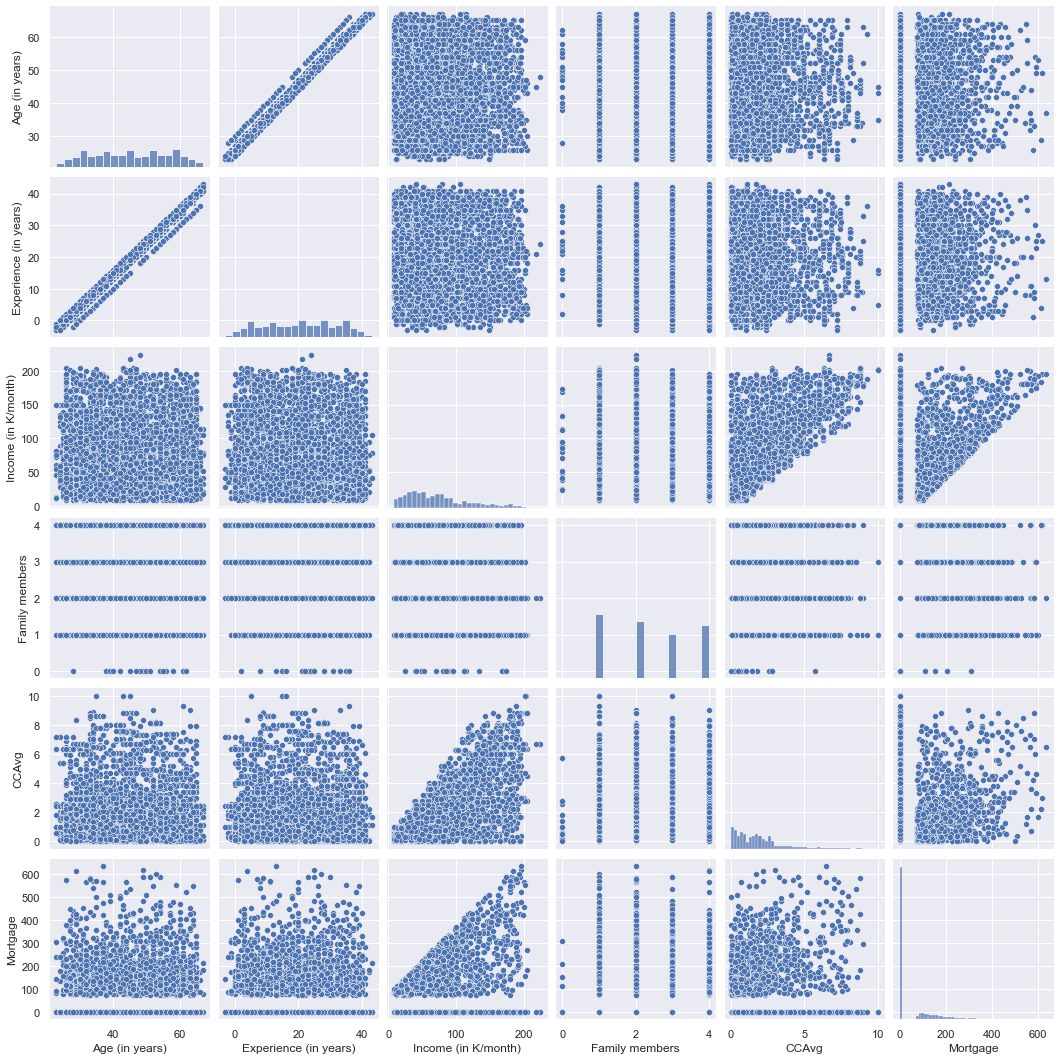

In [17]:
sns.pairplot(df_analysis) 

`Summary Plot With Class Distribution`

In order to see the distribution of the classes and what might be the division, the different classes is colored against the the different variables

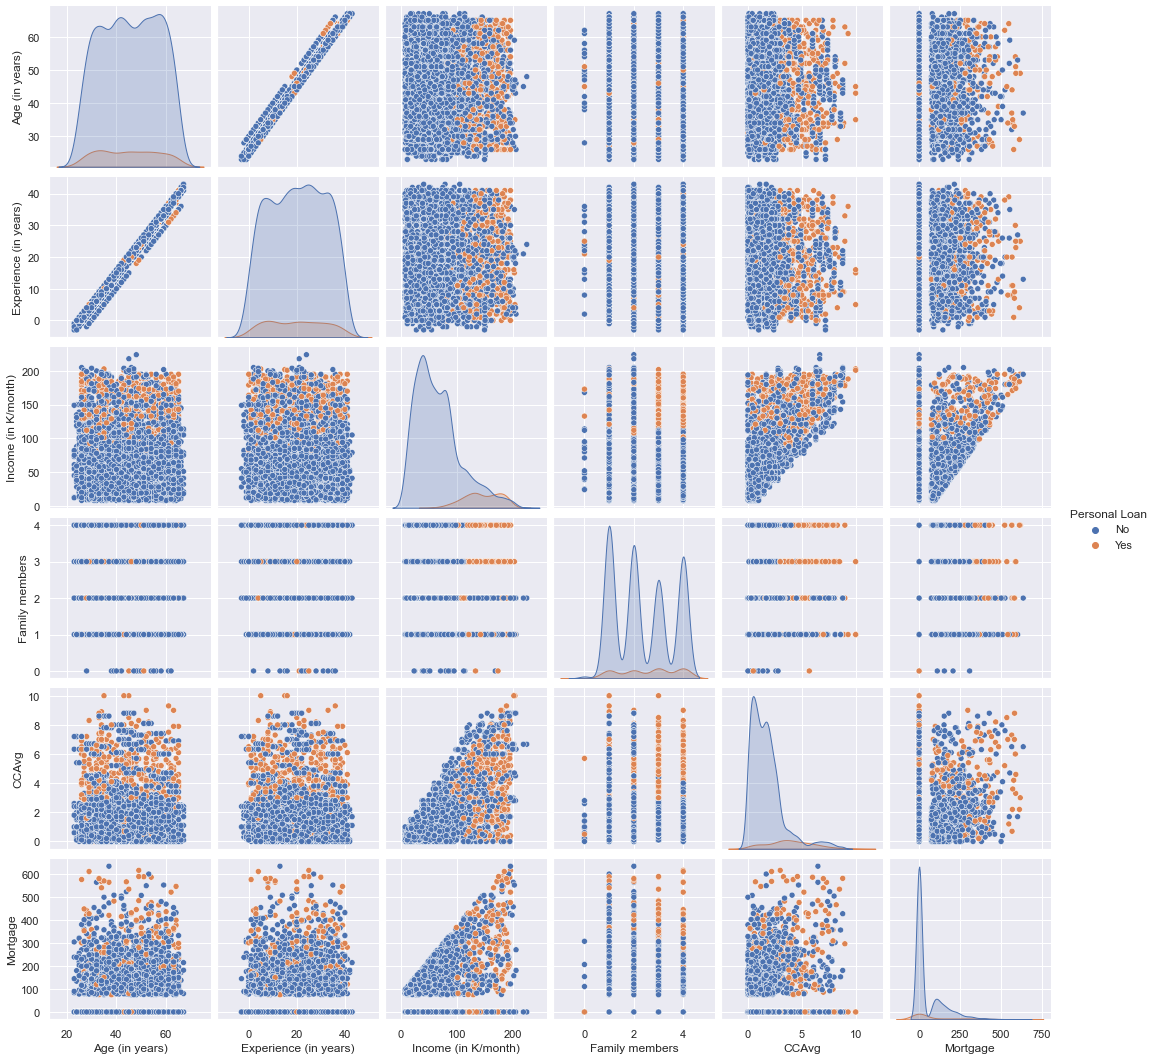

In [18]:
sns.pairplot(df_analysis, hue= 'Personal Loan' )


From what can be seen in this plot above, the `Higher earners`, `Higher CCAvg` are likely to accept a Personal Loan 

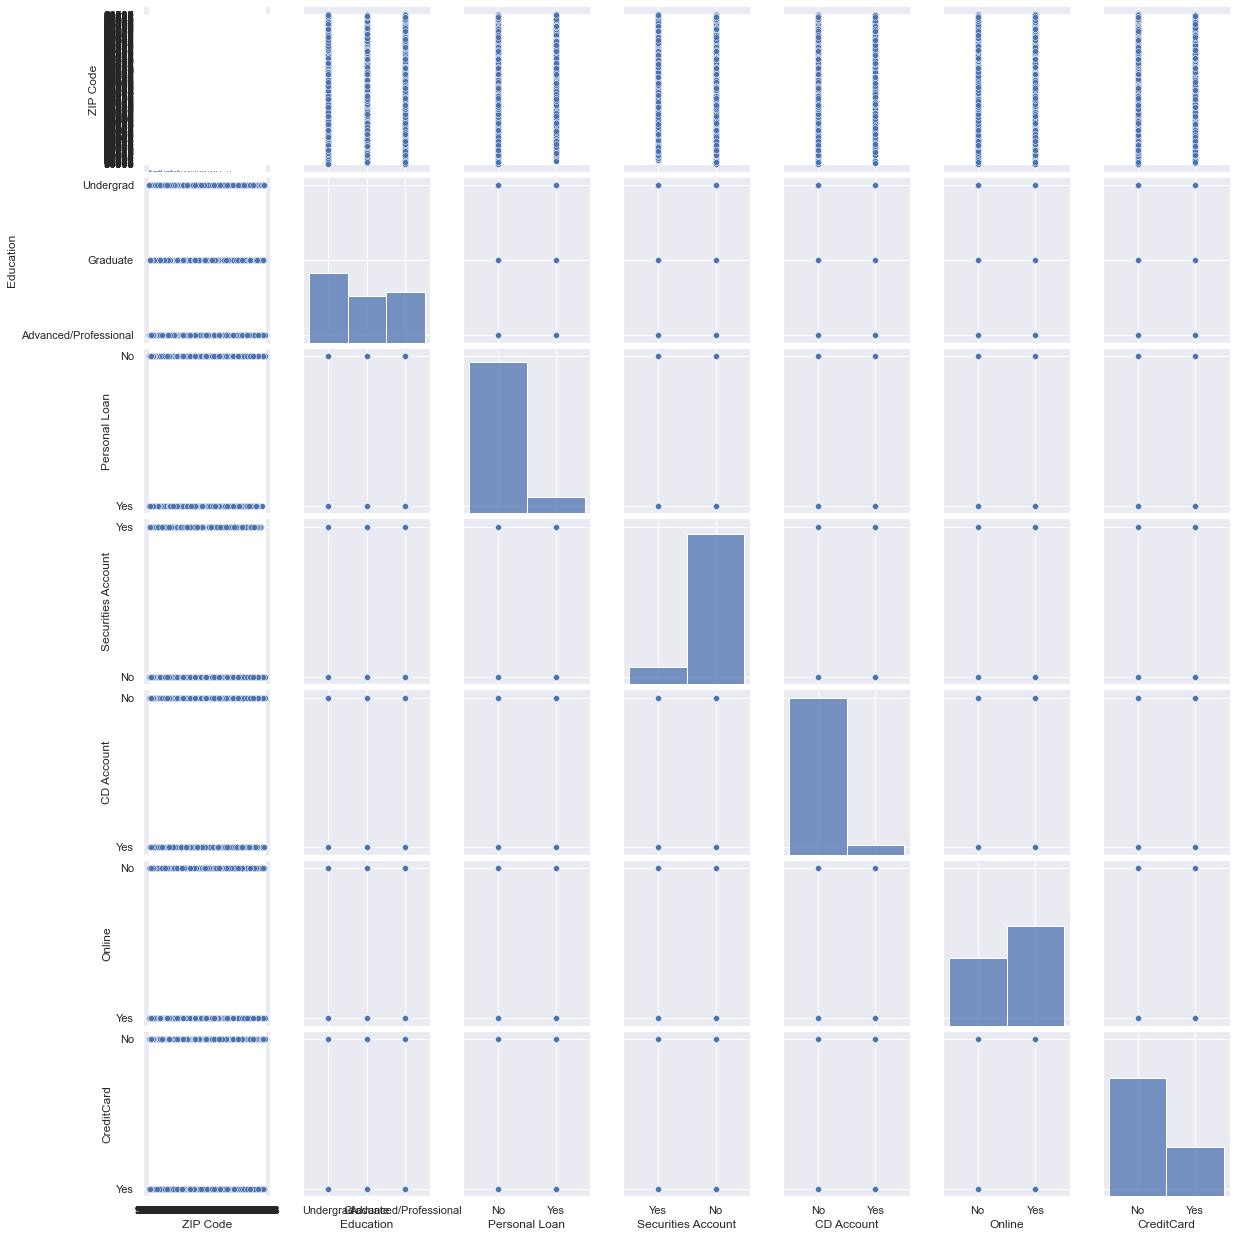

In [19]:
sns.pairplot(df_analysis, vars= categorical)

### Distibution Charts

Text(0.5, 1.0, 'Distibution of Personal Loan Answers')

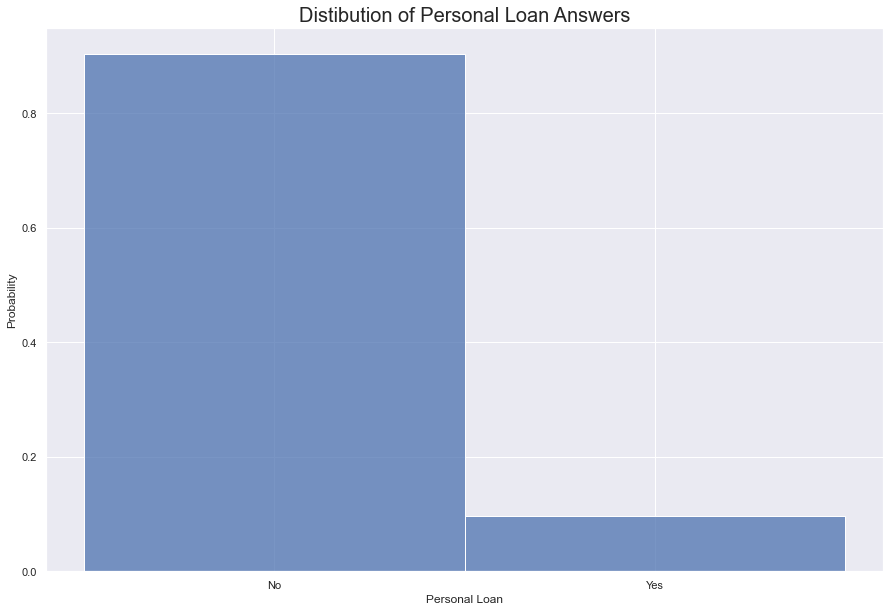

In [20]:
sns.histplot(df_analysis['Personal Loan'], stat='probability')
plt.title('Distibution of Personal Loan Answers', size= 20)

 - Around 90%+ said Yes to a personal loan offer
 
 This means we have an imbalanced dataset

<AxesSubplot:xlabel='Securities Account', ylabel='Probability'>

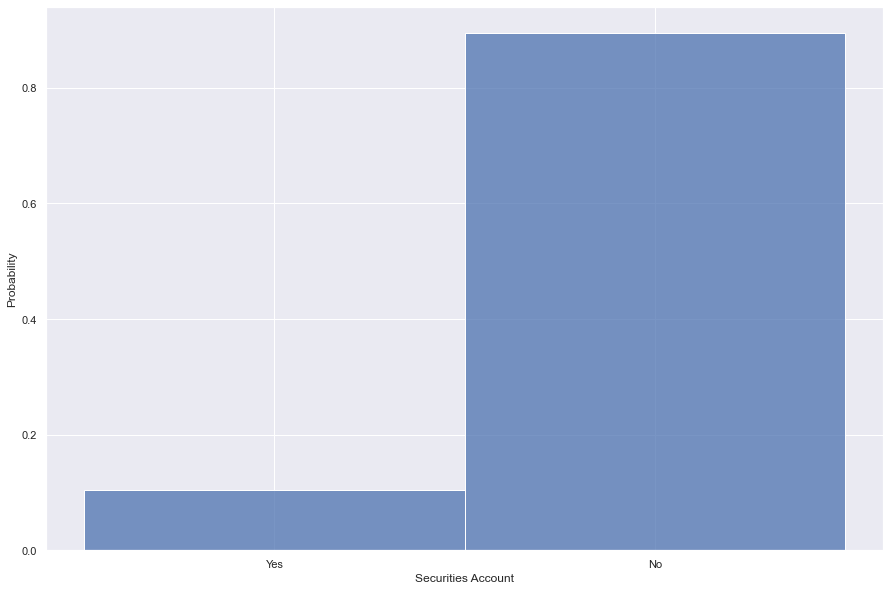

In [21]:
sns.histplot(df_analysis['Securities Account'], stat='probability')

- Around 90%+ said Yes to a Security loan offer

<AxesSubplot:xlabel='CD Account', ylabel='Probability'>

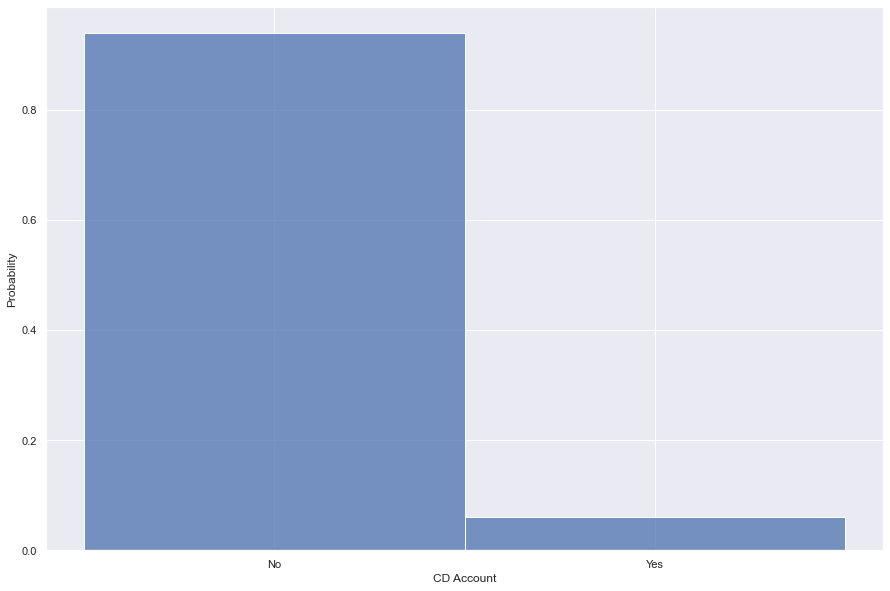

In [22]:
sns.histplot(df_analysis['CD Account'], stat='probability')

<AxesSubplot:xlabel='Online', ylabel='Probability'>

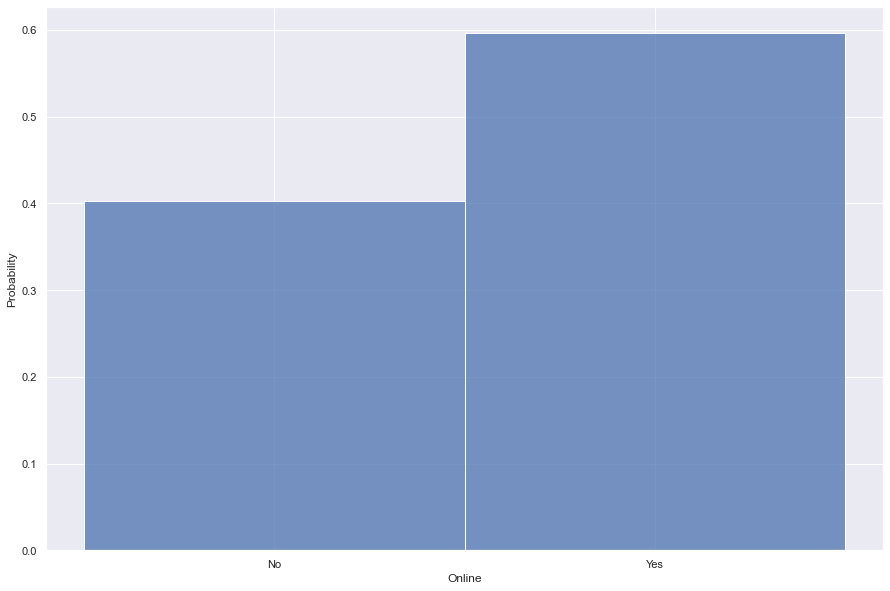

In [23]:
sns.histplot(df_analysis['Online'], stat='probability')

<AxesSubplot:xlabel='CreditCard', ylabel='Probability'>

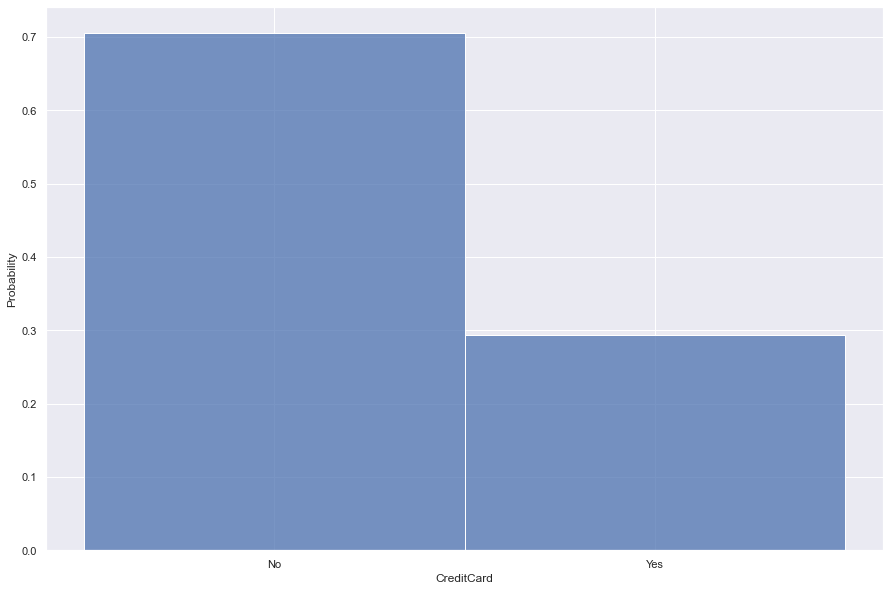

In [24]:
sns.histplot(df_analysis['CreditCard'], stat='probability')

Text(0.5, 1.0, 'Avg. spending on credit cards per month in Bins')

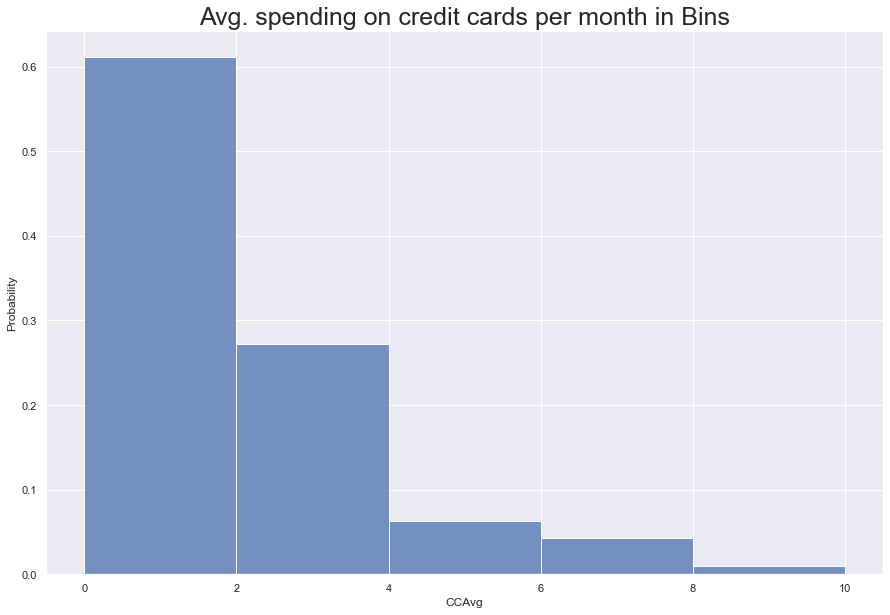

In [25]:
sns.histplot(df_analysis['CCAvg'], bins= 5, stat='probability')
plt.title('Avg. spending on credit cards per month in Bins', size=25)

Text(0.5, 1.0, 'Income (in K/month) per month in Bins')

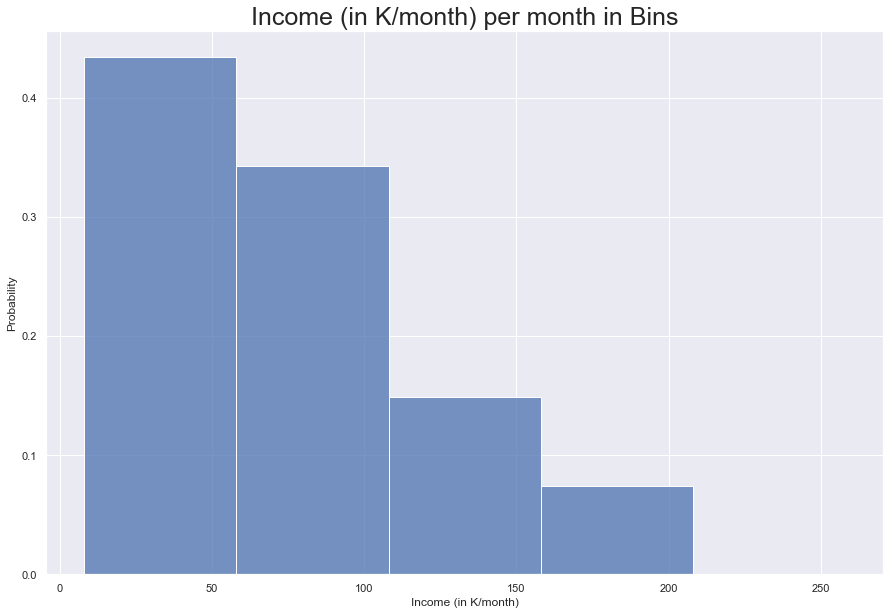

In [26]:
sns.histplot(df_analysis['Income (in K/month)'], binwidth= 50, stat='probability')
plt.title('Income (in K/month) per month in Bins', size=25)

### Relationship with the Label Charts

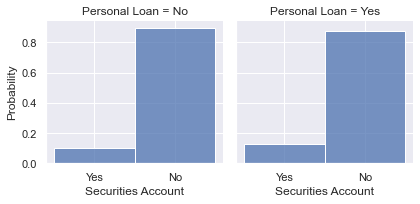

In [27]:
g = sns.FacetGrid(df_analysis, col='Personal Loan'  , margin_titles=True)
g.map(sns.histplot, 'Securities Account', stat='probability')



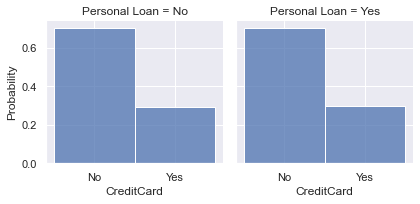

In [28]:
g = sns.FacetGrid(df_analysis, col='Personal Loan'  , margin_titles=True)
g.map(sns.histplot, 'CreditCard', stat='probability')

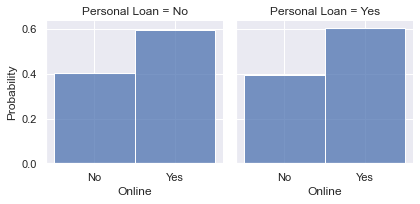

In [29]:
g = sns.FacetGrid(df_analysis, col='Personal Loan'  , margin_titles=True)
g.map(sns.histplot, 'Online', stat='probability')

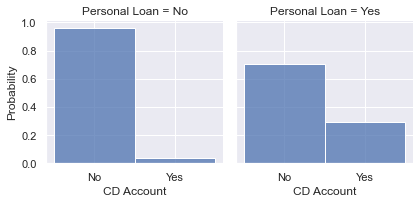

In [30]:
g = sns.FacetGrid(df_analysis, col='Personal Loan'  , margin_titles=True)
g.map(sns.histplot, 'CD Account', stat='probability')


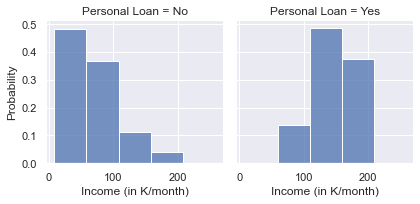

In [31]:

g = sns.FacetGrid(df_analysis, col='Personal Loan'  , margin_titles=True)
g.map(sns.histplot, 'Income (in K/month)', binwidth=50, stat='probability')


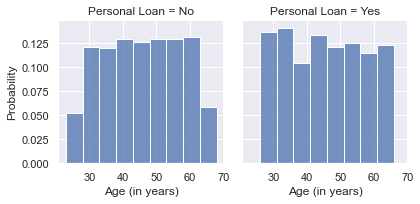

In [32]:
g = sns.FacetGrid(df_analysis, col='Personal Loan'  , margin_titles=True)
g.map(sns.histplot, 'Age (in years)', binwidth=5, stat='probability')

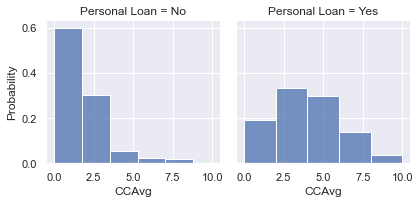

In [33]:

g = sns.FacetGrid(df_analysis, col='Personal Loan'  , margin_titles=True)
g.map(sns.histplot, 'CCAvg', bins=5, stat='probability')

# Data Insights/ Report 
- There is a lot more tendency for people that earn higher than 100 to take a personal loan than otherwise

- There is a lot more tendency for people with a higher family members to take the loan.

- Around 90%+ said Yes to a Security loan offer

In [34]:
df_analysis.columns

Index(['Age (in years)', 'Experience (in years)', 'Income (in K/month)',
       'ZIP Code', 'Family members', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

In [35]:
Sc = StandardScaler()
One  = OneHotEncoder()
Lb =  LabelEncoder()

In [36]:
df_analysis = df_analysis.drop(columns=['Personal Loan'])
y = df['Personal Loan']

In [37]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age (in years)         5000 non-null   int64  
 1   Experience (in years)  5000 non-null   int64  
 2   Income (in K/month)    5000 non-null   int64  
 3   ZIP Code               5000 non-null   object 
 4   Family members         5000 non-null   float64
 5   CCAvg                  5000 non-null   float64
 6   Education              5000 non-null   object 
 7   Mortgage               5000 non-null   int64  
 8   Securities Account     5000 non-null   object 
 9   CD Account             5000 non-null   object 
 10  Online                 5000 non-null   object 
 11  CreditCard             5000 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 468.9+ KB


In [38]:
Categorical =[]
Continous = []

for i in df_analysis.columns:
    if df_analysis[i].dtypes =='object':
        Categorical.append(i)
    else:
        Continous.append(i)
        

In [39]:
def data_transformation(df_analysis):
    df_analysis[Continous] = Sc.fit_transform(df_analysis[Continous])
    df_analysis[Categorical] = pd.factorize(df_analysis[Categorical].values.ravel())[0].reshape(df_analysis[Categorical].shape)
    return df_analysis

In [40]:
transform_df = data_transformation(df_analysis)

In [41]:
transform_df

,Age (in years),Experience (in years),Income (in K/month),ZIP Code,Family members,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,-1.774417,-1.666078,-0.538229,0,1.396427,-0.193385,1,-0.555524,2,3,3,3
1,-0.029524,-0.096330,-0.864109,4,0.529834,-0.250611,1,-0.555524,2,3,3,3
2,-0.552992,-0.445163,-1.363793,5,-1.203350,-0.536736,1,-0.555524,3,3,3,3
3,-0.901970,-0.968413,0.569765,6,-1.203350,0.436091,7,-0.555524,3,3,3,3
4,-0.901970,-1.055621,-0.625130,8,1.396427,-0.536736,7,-0.555524,3,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.425438,-1.491662,-0.733757,143,-1.203350,-0.021710,12,-0.555524,3,3,2,3
4996,-1.338194,-1.404454,-1.276892,85,1.396427,-0.880087,1,0.280238,3,3,2,3
4997,1.540880,1.647835,-1.081363,13,-0.336758,-0.937312,12,-0.555524,3,3,3,3
4998,1.715370,1.735043,-0.538229,190,0.529834,-0.822862,7,-0.555524,3,3,2,3


In [42]:
X_train, X_test, y_train, y_test = train_test_split(transform_df, y, test_size=0.33, random_state=42, stratify=y)

In [43]:
class_weight = {'class_weight':[{0:x,1:1000-x} for x in np.linspace(0,1000,100)]}

# Class Weight Selection

In [44]:
rfc = RandomForestClassifier(n_estimators=10000)
f1_score = make_scorer(fbeta_score, beta=1, average='micro')

In [45]:

model = GridSearchCV(estimator=rfc, param_grid=class_weight, cv=3,n_jobs=-1,scoring=f1_score).fit(X_train, y_train)

In [46]:
pd.DataFrame(model.cv_results_).sort_values(['mean_test_score'], ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
93,17.353613,0.419219,1.531255,0.445769,"{0: 939.3939393939394, 1: 60.60606060606062}","{'class_weight': {0: 939.3939393939394, 1: 60....",0.987466,0.982095,0.983871,0.984477,0.002234,1
95,17.595672,0.104446,1.233734,0.007202,"{0: 959.5959595959596, 1: 40.404040404040416}","{'class_weight': {0: 959.5959595959596, 1: 40....",0.987466,0.981200,0.983871,0.984179,0.002568,2
59,14.897469,0.192346,1.357487,0.021573,"{0: 595.959595959596, 1: 404.04040404040404}","{'class_weight': {0: 595.959595959596, 1: 404....",0.986571,0.981200,0.983871,0.983881,0.002193,3
55,15.580369,0.144547,1.226285,0.055112,"{0: 555.5555555555555, 1: 444.44444444444446}","{'class_weight': {0: 555.5555555555555, 1: 444...",0.986571,0.981200,0.983871,0.983881,0.002193,3
54,15.399966,0.512171,1.421816,0.372791,"{0: 545.4545454545454, 1: 454.5454545454546}","{'class_weight': {0: 545.4545454545454, 1: 454...",0.986571,0.981200,0.983871,0.983881,0.002193,3
...,...,...,...,...,...,...,...,...,...,...,...,...
2,14.794240,0.297077,1.208195,0.016535,"{0: 20.2020202020202, 1: 979.7979797979798}","{'class_weight': {0: 20.2020202020202, 1: 979....",0.982095,0.977619,0.982079,0.980597,0.002106,96
7,13.771375,0.128048,0.963134,0.029022,"{0: 70.7070707070707, 1: 929.2929292929293}","{'class_weight': {0: 70.7070707070707, 1: 929....",0.982990,0.979409,0.979391,0.980597,0.001692,97
1,15.083021,0.164837,1.200113,0.012712,"{0: 10.1010101010101, 1: 989.89898989899}","{'class_weight': {0: 10.1010101010101, 1: 989....",0.981200,0.977619,0.981183,0.980000,0.001684,98
99,6.111126,0.061701,0.427804,0.002938,"{0: 1000.0, 1: 0.0}","{'class_weight': {0: 1000.0, 1: 0.0}}",0.904208,0.903312,0.904122,0.903881,0.000403,99


In [47]:
optimal_class_weight_params = pd.DataFrame(model.cv_results_).sort_values(['mean_test_score'], ascending=False)['param_class_weight'].values[0]

# Grid Search  For Various Algorithms

In [48]:
import numpy as np
svc_clf = SVC()
dtree = DecisionTreeClassifier()

SGD = SGDClassifier() 
LR = LogisticRegression()
KNb = KNeighborsClassifier()
rfc = RandomForestClassifier()
gbr = GradientBoostingClassifier()


svcparams = {'degree':[1,2,3, 10], 'C':[1,10], 'class_weight':[optimal_class_weight_params] }
dtreeparams = {'max_depth':[1,2,3], 'class_weight':[optimal_class_weight_params] }
SGDparams = {'l1_ratio':[0.1,0.15,0.2,0.5], 'class_weight':[optimal_class_weight_params] }
LRparams = {'l1_ratio':[0.1,0.15,0.2,0.5, 0.6,0.7, 0.8, 1], 'class_weight':[optimal_class_weight_params] }
KNbparams = {'n_neighbors':[1,2,3,4,5] , 'class_weight':[optimal_class_weight_params]}
rfcparams = {'n_estimators': [100, 1000,10000], 'max_features':['auto', 'sqrt', 'log2']}
gbrparams = {'n_estimators': [100, 1000,10000], 'loss': ['deviance', 'exponential'], 'class_weight':[optimal_class_weight_params] }
algorithm = []
scores = []

list_of_algorithms = [(svc_clf, svcparams, 'SVC' ), ( dtree, dtreeparams, 'dtree') ,( rfc, rfcparams, 'rfc'),
                      (SGD,SGDparams, 'SGD'), (LR, LRparams, 'LR') ]

In [49]:



def Grid_Search(model, paramaters, X, y):
    model1 = GridSearchCV(estimator=model, 
                 param_grid=paramaters, 
                 cv=3,       
                scoring= f1_score
                )
    
    return model1.fit(X_train, y_train)


for (model, parameters, name_of_algorithms) in list_of_algorithms:
    model1 = Grid_Search(model, parameters, X_train, y_train)
    scores.append(pd.DataFrame(model1.cv_results_)['mean_test_score'].max())
    algorithm.append(name_of_algorithms)
    
Performance_test_dataset = pd.DataFrame(scores,algorithm, columns=['F1 Score Performance'])


/Users/yaqoobao/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/yaqoobao/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yaqoobao/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/yaqoobao/mi

/Users/yaqoobao/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yaqoobao/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/yaqoobao/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of it

/Users/yaqoobao/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yaqoobao/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/yaqoobao/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of it

In [50]:
Performance_test_dataset['F1 Score Performance'].sort_values(ascending=False)

rfc      0.984179
dtree    0.973727
LR       0.932237
SGD      0.919399
SVC      0.915821
Name: F1 Score Performance, dtype: float64

`Random Forest` Performs the Best of way ahead of all the algorithms used. As such further Grid Search will be done on `Random Forest`

In [51]:
rfc = RandomForestClassifier(n_jobs= -1)
rfcparams = {'n_estimators': [100, 1000,10000, 10000], 'criterion': ['gini', 'entropy'],
             'max_features':['auto', 'sqrt', 'log2'], 'class_weight':[optimal_class_weight_params]}

In [52]:
rfc_model = GridSearchCV(estimator=rfc, 
                 param_grid=rfcparams, 
                 cv=3,       
                scoring= f1_score
                )
    
rfc_model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'class_weight': [{0: 939.3939393939394,
                                           1: 60.60606060606062}],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 1000, 10000, 10000]},
             scoring=make_scorer(fbeta_score, beta=1, average=micro))

In [53]:
pd.DataFrame(rfc_model.cv_results_).sort_values(by=['mean_test_score'], ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_criterion,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
21,0.327490,0.019285,0.107911,0.007312,"{0: 939.3939393939394, 1: 60.60606060606062}",entropy,log2,1000,"{'class_weight': {0: 939.3939393939394, 1: 60....",0.988362,0.982095,0.983871,0.984776,0.002637,1
4,0.071328,0.034644,0.014798,0.001356,"{0: 939.3939393939394, 1: 60.60606060606062}",gini,sqrt,100,"{'class_weight': {0: 939.3939393939394, 1: 60....",0.986571,0.982095,0.984767,0.984478,0.001839,2
2,3.174236,0.116510,1.042047,0.011549,"{0: 939.3939393939394, 1: 60.60606060606062}",gini,auto,10000,"{'class_weight': {0: 939.3939393939394, 1: 60....",0.987466,0.982095,0.983871,0.984477,0.002234,3
23,3.185799,0.230659,1.082505,0.041435,"{0: 939.3939393939394, 1: 60.60606060606062}",entropy,log2,10000,"{'class_weight': {0: 939.3939393939394, 1: 60....",0.988362,0.982095,0.982975,0.984477,0.002770,4
15,2.879757,0.132519,1.076779,0.044608,"{0: 939.3939393939394, 1: 60.60606060606062}",entropy,auto,10000,"{'class_weight': {0: 939.3939393939394, 1: 60....",0.988362,0.982095,0.982975,0.984477,0.002770,4
1,0.478069,0.144537,0.122174,0.023727,"{0: 939.3939393939394, 1: 60.60606060606062}",gini,auto,1000,"{'class_weight': {0: 939.3939393939394, 1: 60....",0.988362,0.982095,0.982975,0.984477,0.002770,4
19,3.110057,0.349623,1.043271,0.023321,"{0: 939.3939393939394, 1: 60.60606060606062}",entropy,sqrt,10000,"{'class_weight': {0: 939.3939393939394, 1: 60....",0.988362,0.982095,0.982975,0.984477,0.002770,4
13,0.323489,0.009940,0.110681,0.003442,"{0: 939.3939393939394, 1: 60.60606060606062}",entropy,auto,1000,"{'class_weight': {0: 939.3939393939394, 1: 60....",0.989257,0.982095,0.982079,0.984477,0.003380,8
17,0.337376,0.022414,0.107020,0.009418,"{0: 939.3939393939394, 1: 60.60606060606062}",entropy,sqrt,1000,"{'class_weight': {0: 939.3939393939394, 1: 60....",0.988362,0.981200,0.982975,0.984179,0.003045,9
7,3.025406,0.104687,1.073252,0.008358,"{0: 939.3939393939394, 1: 60.60606060606062}",gini,sqrt,10000,"{'class_weight': {0: 939.3939393939394, 1: 60....",0.987466,0.982095,0.982975,0.984179,0.002352,9


In [54]:
rfc_model.best_estimator_

RandomForestClassifier(class_weight={0: 939.3939393939394,
                                     1: 60.60606060606062},
                       criterion='entropy', max_features='log2',
                       n_estimators=1000, n_jobs=-1)

In [55]:
y_pred = rfc_model.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix, cohen_kappa_score

In [57]:
'The Cohen Kappa Score is {} %'.format(round(cohen_kappa_score(y_test,y_pred) * 100,2))

'The Cohen Kappa Score is 94.61 %'

In [58]:
cm = confusion_matrix(y_test,y_pred)

[Text(0, 0.5, 'Actual Customer Non-Accepting Loan'),
 Text(0, 1.5, 'Actual Customer Accepting Loan')]

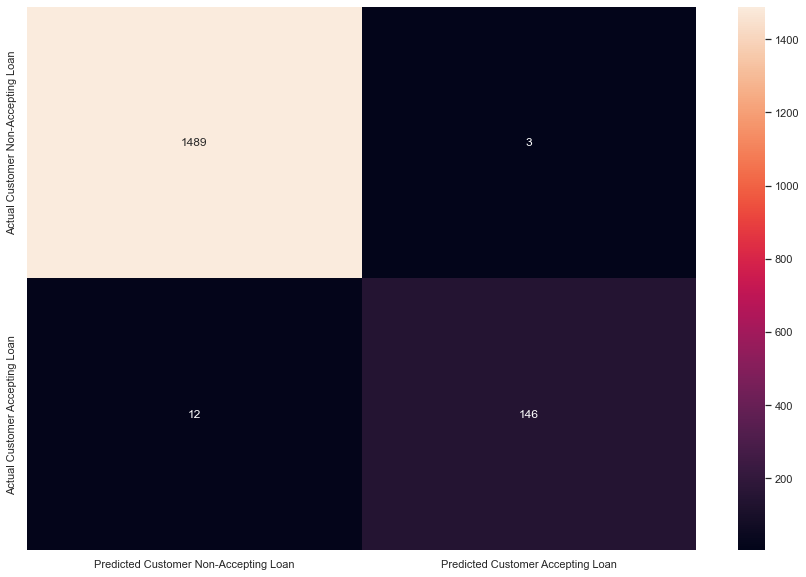

In [59]:
g = sns.heatmap(cm,fmt="d", annot=True)
g.get_xaxis().set_label_coords(-0.2,0.5)
g.get_yaxis().set_label_coords(-0.2,0.5)
g.set_xticklabels(['Predicted Customer Non-Accepting Loan', 'Predicted Customer Accepting Loan'], ha='center')
g.set_yticklabels(['Actual Customer Non-Accepting Loan', 'Actual Customer Accepting Loan'], va='center')

# Deep Learning Classification Approach

`Importing Tensorflow`

Importing **Google's** Deep Learning Library 

In [213]:
import tensorflow as tf

`Calculating The Output Bias`

Since the dataset output is imbalanced

In [214]:
neg, pos = np.bincount(y_train) 

In [215]:
initial_bias = np.log([pos/neg])

In [216]:
output_bias =tf.constant_initializer(initial_bias)

In [217]:
X_train.shape

(3350, 12)

`Building the Neural Network model`

In [222]:
DeepModel = tf.keras.Sequential(
                            [tf.keras.layers.Dense(128, activation='relu', input_shape=(12,)),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dropout(0.5),
                            tf.keras.layers.Dense(1, activation='sigmoid', bias_initializer=output_bias)
                            ]
                                )

In [223]:
metrics = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
      tf.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

DeepModel.compile(loss=tf.keras.losses.BinaryCrossentropy(), metrics=metrics, optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4))


In [224]:
DeepModel.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 128)               1664      
_________________________________________________________________
dense_41 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 129       
Total params: 18,305
Trainable params: 18,305
Non-trainable params: 0
_________________________________________________________________


`Plotting the neural network`

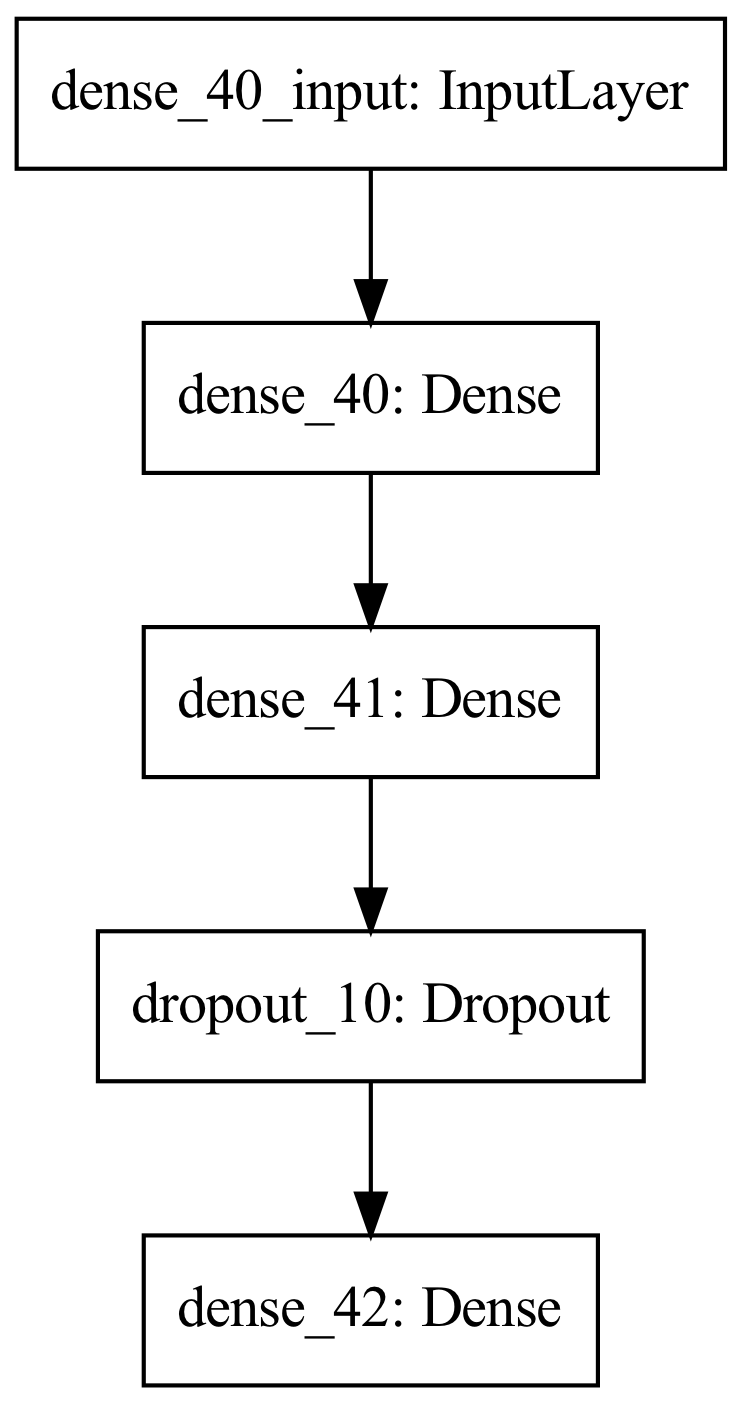

In [234]:
tf.keras.utils.plot_model(
    DeepModel, to_file='model.png', show_shapes=False, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=300
    
)

`Fitting the Neural Network Model`

In [225]:
DeepModel.fit(X_train, y_train, epochs=500)

Epoch 1/500


2022-01-09 02:10:25.199404: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


105/105 [==============================] - 3s 17ms/step - loss: 2.6707 - tp: 28.0000 - fp: 309.0000 - tn: 2719.0000 - fn: 294.0000 - accuracy: 0.8200 - precision: 0.0831 - recall: 0.0870 - auc: 0.4957 - prc: 0.0935
Epoch 2/500
105/105 [==============================] - 2s 16ms/step - loss: 2.1340 - tp: 20.0000 - fp: 199.0000 - tn: 2829.0000 - fn: 302.0000 - accuracy: 0.8504 - precision: 0.0913 - recall: 0.0621 - auc: 0.4839 - prc: 0.0926
Epoch 3/500
105/105 [==============================] - 2s 16ms/step - loss: 1.6525 - tp: 21.0000 - fp: 177.0000 - tn: 2851.0000 - fn: 301.0000 - accuracy: 0.8573 - precision: 0.1061 - recall: 0.0652 - auc: 0.5102 - prc: 0.1020
Epoch 4/500
105/105 [==============================] - 2s 16ms/step - loss: 1.2588 - tp: 17.0000 - fp: 183.0000 - tn: 2845.0000 - fn: 305.0000 - accuracy: 0.8543 - precision: 0.0850 - recall: 0.0528 - auc: 0.5100 - prc: 0.0988
Epoch 5/500
105/105 [==============================] - 2s 16ms/step - loss: 0.8671 - tp: 27.0000 - fp: 1

105/105 [==============================] - 2s 16ms/step - loss: 0.1281 - tp: 195.0000 - fp: 30.0000 - tn: 2998.0000 - fn: 127.0000 - accuracy: 0.9531 - precision: 0.8667 - recall: 0.6056 - auc: 0.9609 - prc: 0.8183
Epoch 38/500
105/105 [==============================] - 2s 16ms/step - loss: 0.1178 - tp: 201.0000 - fp: 25.0000 - tn: 3003.0000 - fn: 121.0000 - accuracy: 0.9564 - precision: 0.8894 - recall: 0.6242 - auc: 0.9657 - prc: 0.8492
Epoch 39/500
105/105 [==============================] - 2s 15ms/step - loss: 0.1263 - tp: 189.0000 - fp: 27.0000 - tn: 3001.0000 - fn: 133.0000 - accuracy: 0.9522 - precision: 0.8750 - recall: 0.5870 - auc: 0.9607 - prc: 0.8303
Epoch 40/500
105/105 [==============================] - 2s 16ms/step - loss: 0.1199 - tp: 203.0000 - fp: 22.0000 - tn: 3006.0000 - fn: 119.0000 - accuracy: 0.9579 - precision: 0.9022 - recall: 0.6304 - auc: 0.9644 - prc: 0.8422
Epoch 41/500
105/105 [==============================] - 2s 16ms/step - loss: 0.1213 - tp: 203.0000 - 

105/105 [==============================] - 2s 15ms/step - loss: 0.0909 - tp: 239.0000 - fp: 21.0000 - tn: 3007.0000 - fn: 83.0000 - accuracy: 0.9690 - precision: 0.9192 - recall: 0.7422 - auc: 0.9746 - prc: 0.9053
Epoch 74/500
105/105 [==============================] - 2s 15ms/step - loss: 0.0865 - tp: 253.0000 - fp: 21.0000 - tn: 3007.0000 - fn: 69.0000 - accuracy: 0.9731 - precision: 0.9234 - recall: 0.7857 - auc: 0.9769 - prc: 0.9102
Epoch 75/500
105/105 [==============================] - 2s 16ms/step - loss: 0.0845 - tp: 249.0000 - fp: 20.0000 - tn: 3008.0000 - fn: 73.0000 - accuracy: 0.9722 - precision: 0.9257 - recall: 0.7733 - auc: 0.9770 - prc: 0.9163
Epoch 76/500
105/105 [==============================] - 2s 16ms/step - loss: 0.0864 - tp: 243.0000 - fp: 20.0000 - tn: 3008.0000 - fn: 79.0000 - accuracy: 0.9704 - precision: 0.9240 - recall: 0.7547 - auc: 0.9761 - prc: 0.9125
Epoch 77/500
105/105 [==============================] - 2s 16ms/step - loss: 0.0833 - tp: 248.0000 - fp: 

105/105 [==============================] - 2s 15ms/step - loss: 0.0787 - tp: 255.0000 - fp: 20.0000 - tn: 3008.0000 - fn: 67.0000 - accuracy: 0.9740 - precision: 0.9273 - recall: 0.7919 - auc: 0.9790 - prc: 0.9236
Epoch 110/500
105/105 [==============================] - 2s 15ms/step - loss: 0.0754 - tp: 257.0000 - fp: 24.0000 - tn: 3004.0000 - fn: 65.0000 - accuracy: 0.9734 - precision: 0.9146 - recall: 0.7981 - auc: 0.9835 - prc: 0.9295
Epoch 111/500
105/105 [==============================] - 2s 15ms/step - loss: 0.0719 - tp: 263.0000 - fp: 19.0000 - tn: 3009.0000 - fn: 59.0000 - accuracy: 0.9767 - precision: 0.9326 - recall: 0.8168 - auc: 0.9782 - prc: 0.9350
Epoch 112/500
105/105 [==============================] - 982s 9s/step - loss: 0.0737 - tp: 256.0000 - fp: 24.0000 - tn: 3004.0000 - fn: 66.0000 - accuracy: 0.9731 - precision: 0.9143 - recall: 0.7950 - auc: 0.9819 - prc: 0.9333
Epoch 113/500
105/105 [==============================] - 2s 15ms/step - loss: 0.0776 - tp: 251.0000 - 

105/105 [==============================] - 2s 15ms/step - loss: 0.0739 - tp: 261.0000 - fp: 16.0000 - tn: 3012.0000 - fn: 61.0000 - accuracy: 0.9770 - precision: 0.9422 - recall: 0.8106 - auc: 0.9807 - prc: 0.9299
Epoch 145/500
105/105 [==============================] - 1008s 10s/step - loss: 0.0704 - tp: 263.0000 - fp: 18.0000 - tn: 3010.0000 - fn: 59.0000 - accuracy: 0.9770 - precision: 0.9359 - recall: 0.8168 - auc: 0.9800 - prc: 0.9351
Epoch 146/500
105/105 [==============================] - 2s 15ms/step - loss: 0.0715 - tp: 264.0000 - fp: 20.0000 - tn: 3008.0000 - fn: 58.0000 - accuracy: 0.9767 - precision: 0.9296 - recall: 0.8199 - auc: 0.9810 - prc: 0.9330
Epoch 147/500
105/105 [==============================] - 2s 15ms/step - loss: 0.0695 - tp: 262.0000 - fp: 20.0000 - tn: 3008.0000 - fn: 60.0000 - accuracy: 0.9761 - precision: 0.9291 - recall: 0.8137 - auc: 0.9847 - prc: 0.9371
Epoch 148/500
105/105 [==============================] - 2s 15ms/step - loss: 0.0672 - tp: 265.0000 

Epoch 180/500
105/105 [==============================] - 2s 16ms/step - loss: 0.0631 - tp: 270.0000 - fp: 21.0000 - tn: 3007.0000 - fn: 52.0000 - accuracy: 0.9782 - precision: 0.9278 - recall: 0.8385 - auc: 0.9871 - prc: 0.9458
Epoch 181/500
105/105 [==============================] - 2s 17ms/step - loss: 0.0602 - tp: 270.0000 - fp: 21.0000 - tn: 3007.0000 - fn: 52.0000 - accuracy: 0.9782 - precision: 0.9278 - recall: 0.8385 - auc: 0.9867 - prc: 0.9492
Epoch 182/500
105/105 [==============================] - 2s 16ms/step - loss: 0.0698 - tp: 263.0000 - fp: 20.0000 - tn: 3008.0000 - fn: 59.0000 - accuracy: 0.9764 - precision: 0.9293 - recall: 0.8168 - auc: 0.9821 - prc: 0.9331
Epoch 183/500
105/105 [==============================] - 2s 16ms/step - loss: 0.0598 - tp: 274.0000 - fp: 17.0000 - tn: 3011.0000 - fn: 48.0000 - accuracy: 0.9806 - precision: 0.9416 - recall: 0.8509 - auc: 0.9871 - prc: 0.9506
Epoch 184/500
105/105 [==============================] - 2s 16ms/step - loss: 0.0622 - t

105/105 [==============================] - 2s 16ms/step - loss: 0.0574 - tp: 278.0000 - fp: 12.0000 - tn: 3016.0000 - fn: 44.0000 - accuracy: 0.9833 - precision: 0.9586 - recall: 0.8634 - auc: 0.9876 - prc: 0.9520
Epoch 216/500
105/105 [==============================] - 2s 16ms/step - loss: 0.0640 - tp: 273.0000 - fp: 19.0000 - tn: 3009.0000 - fn: 49.0000 - accuracy: 0.9797 - precision: 0.9349 - recall: 0.8478 - auc: 0.9828 - prc: 0.9420
Epoch 217/500
105/105 [==============================] - 2s 16ms/step - loss: 0.0569 - tp: 277.0000 - fp: 15.0000 - tn: 3013.0000 - fn: 45.0000 - accuracy: 0.9821 - precision: 0.9486 - recall: 0.8602 - auc: 0.9869 - prc: 0.9534
Epoch 218/500
105/105 [==============================] - 2s 15ms/step - loss: 0.0592 - tp: 277.0000 - fp: 17.0000 - tn: 3011.0000 - fn: 45.0000 - accuracy: 0.9815 - precision: 0.9422 - recall: 0.8602 - auc: 0.9858 - prc: 0.9498
Epoch 219/500
105/105 [==============================] - 2s 16ms/step - loss: 0.0604 - tp: 278.0000 - 

Epoch 251/500
105/105 [==============================] - 2s 16ms/step - loss: 0.0575 - tp: 272.0000 - fp: 19.0000 - tn: 3009.0000 - fn: 50.0000 - accuracy: 0.9794 - precision: 0.9347 - recall: 0.8447 - auc: 0.9876 - prc: 0.9522
Epoch 252/500
105/105 [==============================] - 2s 16ms/step - loss: 0.0545 - tp: 284.0000 - fp: 15.0000 - tn: 3013.0000 - fn: 38.0000 - accuracy: 0.9842 - precision: 0.9498 - recall: 0.8820 - auc: 0.9866 - prc: 0.9545
Epoch 253/500
105/105 [==============================] - 2s 16ms/step - loss: 0.0521 - tp: 280.0000 - fp: 11.0000 - tn: 3017.0000 - fn: 42.0000 - accuracy: 0.9842 - precision: 0.9622 - recall: 0.8696 - auc: 0.9885 - prc: 0.9586
Epoch 254/500
105/105 [==============================] - 2s 16ms/step - loss: 0.0554 - tp: 274.0000 - fp: 16.0000 - tn: 3012.0000 - fn: 48.0000 - accuracy: 0.9809 - precision: 0.9448 - recall: 0.8509 - auc: 0.9884 - prc: 0.9550
Epoch 255/500
105/105 [==============================] - 2s 16ms/step - loss: 0.0570 - t

105/105 [==============================] - 2s 15ms/step - loss: 0.0503 - tp: 280.0000 - fp: 13.0000 - tn: 3015.0000 - fn: 42.0000 - accuracy: 0.9836 - precision: 0.9556 - recall: 0.8696 - auc: 0.9905 - prc: 0.9614
Epoch 287/500
105/105 [==============================] - 2s 16ms/step - loss: 0.0541 - tp: 277.0000 - fp: 15.0000 - tn: 3013.0000 - fn: 45.0000 - accuracy: 0.9821 - precision: 0.9486 - recall: 0.8602 - auc: 0.9877 - prc: 0.9549
Epoch 288/500
105/105 [==============================] - 2s 16ms/step - loss: 0.0544 - tp: 279.0000 - fp: 12.0000 - tn: 3016.0000 - fn: 43.0000 - accuracy: 0.9836 - precision: 0.9588 - recall: 0.8665 - auc: 0.9866 - prc: 0.9561
Epoch 289/500
105/105 [==============================] - 2s 16ms/step - loss: 0.0608 - tp: 273.0000 - fp: 15.0000 - tn: 3013.0000 - fn: 49.0000 - accuracy: 0.9809 - precision: 0.9479 - recall: 0.8478 - auc: 0.9900 - prc: 0.9496
Epoch 290/500
105/105 [==============================] - 2s 17ms/step - loss: 0.0581 - tp: 274.0000 - 

Epoch 322/500
105/105 [==============================] - 2s 17ms/step - loss: 0.0492 - tp: 281.0000 - fp: 7.0000 - tn: 3021.0000 - fn: 41.0000 - accuracy: 0.9857 - precision: 0.9757 - recall: 0.8727 - auc: 0.9910 - prc: 0.9645
Epoch 323/500
105/105 [==============================] - 2s 16ms/step - loss: 0.0518 - tp: 281.0000 - fp: 13.0000 - tn: 3015.0000 - fn: 41.0000 - accuracy: 0.9839 - precision: 0.9558 - recall: 0.8727 - auc: 0.9878 - prc: 0.9575
Epoch 324/500
105/105 [==============================] - 2s 16ms/step - loss: 0.0562 - tp: 271.0000 - fp: 12.0000 - tn: 3016.0000 - fn: 51.0000 - accuracy: 0.9812 - precision: 0.9576 - recall: 0.8416 - auc: 0.9904 - prc: 0.9567
Epoch 325/500
105/105 [==============================] - 2s 16ms/step - loss: 0.0517 - tp: 286.0000 - fp: 14.0000 - tn: 3014.0000 - fn: 36.0000 - accuracy: 0.9851 - precision: 0.9533 - recall: 0.8882 - auc: 0.9887 - prc: 0.9585
Epoch 326/500
105/105 [==============================] - 2s 16ms/step - loss: 0.0489 - tp

105/105 [==============================] - 2s 17ms/step - loss: 0.0500 - tp: 284.0000 - fp: 13.0000 - tn: 3015.0000 - fn: 38.0000 - accuracy: 0.9848 - precision: 0.9562 - recall: 0.8820 - auc: 0.9910 - prc: 0.9625
Epoch 358/500
105/105 [==============================] - 2s 16ms/step - loss: 0.0476 - tp: 283.0000 - fp: 14.0000 - tn: 3014.0000 - fn: 39.0000 - accuracy: 0.9842 - precision: 0.9529 - recall: 0.8789 - auc: 0.9936 - prc: 0.9664
Epoch 359/500
105/105 [==============================] - 2s 16ms/step - loss: 0.0555 - tp: 275.0000 - fp: 15.0000 - tn: 3013.0000 - fn: 47.0000 - accuracy: 0.9815 - precision: 0.9483 - recall: 0.8540 - auc: 0.9884 - prc: 0.9551
Epoch 360/500
105/105 [==============================] - 2s 16ms/step - loss: 0.0489 - tp: 285.0000 - fp: 10.0000 - tn: 3018.0000 - fn: 37.0000 - accuracy: 0.9860 - precision: 0.9661 - recall: 0.8851 - auc: 0.9918 - prc: 0.9635
Epoch 361/500
105/105 [==============================] - 2s 15ms/step - loss: 0.0500 - tp: 283.0000 - 

105/105 [==============================] - 2s 16ms/step - loss: 0.0445 - tp: 284.0000 - fp: 11.0000 - tn: 3017.0000 - fn: 38.0000 - accuracy: 0.9854 - precision: 0.9627 - recall: 0.8820 - auc: 0.9941 - prc: 0.9692
Epoch 394/500
105/105 [==============================] - 2s 16ms/step - loss: 0.0446 - tp: 282.0000 - fp: 11.0000 - tn: 3017.0000 - fn: 40.0000 - accuracy: 0.9848 - precision: 0.9625 - recall: 0.8758 - auc: 0.9927 - prc: 0.9674
Epoch 395/500
105/105 [==============================] - 2s 16ms/step - loss: 0.0449 - tp: 287.0000 - fp: 13.0000 - tn: 3015.0000 - fn: 35.0000 - accuracy: 0.9857 - precision: 0.9567 - recall: 0.8913 - auc: 0.9924 - prc: 0.9680
Epoch 396/500
105/105 [==============================] - 2s 16ms/step - loss: 0.0530 - tp: 281.0000 - fp: 16.0000 - tn: 3012.0000 - fn: 41.0000 - accuracy: 0.9830 - precision: 0.9461 - recall: 0.8727 - auc: 0.9898 - prc: 0.9580
Epoch 397/500
105/105 [==============================] - 2s 15ms/step - loss: 0.0464 - tp: 282.0000 - 

105/105 [==============================] - 2s 15ms/step - loss: 0.0454 - tp: 284.0000 - fp: 8.0000 - tn: 3020.0000 - fn: 38.0000 - accuracy: 0.9863 - precision: 0.9726 - recall: 0.8820 - auc: 0.9907 - prc: 0.9662
Epoch 430/500
105/105 [==============================] - 2s 15ms/step - loss: 0.0437 - tp: 284.0000 - fp: 13.0000 - tn: 3015.0000 - fn: 38.0000 - accuracy: 0.9848 - precision: 0.9562 - recall: 0.8820 - auc: 0.9919 - prc: 0.9708
Epoch 431/500
105/105 [==============================] - 2s 15ms/step - loss: 0.0435 - tp: 286.0000 - fp: 13.0000 - tn: 3015.0000 - fn: 36.0000 - accuracy: 0.9854 - precision: 0.9565 - recall: 0.8882 - auc: 0.9930 - prc: 0.9698
Epoch 432/500
105/105 [==============================] - 2s 16ms/step - loss: 0.0476 - tp: 281.0000 - fp: 11.0000 - tn: 3017.0000 - fn: 41.0000 - accuracy: 0.9845 - precision: 0.9623 - recall: 0.8727 - auc: 0.9895 - prc: 0.9651
Epoch 433/500
105/105 [==============================] - 2s 15ms/step - loss: 0.0516 - tp: 279.0000 - f

105/105 [==============================] - 2s 15ms/step - loss: 0.0487 - tp: 283.0000 - fp: 16.0000 - tn: 3012.0000 - fn: 39.0000 - accuracy: 0.9836 - precision: 0.9465 - recall: 0.8789 - auc: 0.9927 - prc: 0.9655
Epoch 466/500
105/105 [==============================] - 2s 16ms/step - loss: 0.0432 - tp: 283.0000 - fp: 6.0000 - tn: 3022.0000 - fn: 39.0000 - accuracy: 0.9866 - precision: 0.9792 - recall: 0.8789 - auc: 0.9944 - prc: 0.9691
Epoch 467/500
105/105 [==============================] - 2s 16ms/step - loss: 0.0449 - tp: 283.0000 - fp: 6.0000 - tn: 3022.0000 - fn: 39.0000 - accuracy: 0.9866 - precision: 0.9792 - recall: 0.8789 - auc: 0.9931 - prc: 0.9686
Epoch 468/500
105/105 [==============================] - 2s 16ms/step - loss: 0.0453 - tp: 282.0000 - fp: 11.0000 - tn: 3017.0000 - fn: 40.0000 - accuracy: 0.9848 - precision: 0.9625 - recall: 0.8758 - auc: 0.9925 - prc: 0.9687
Epoch 469/500
105/105 [==============================] - 2s 16ms/step - loss: 0.0445 - tp: 281.0000 - fp

In [149]:
X_train

,Age (in years),Experience (in years),Income (in K/month),ZIP Code,Family members,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
117,1.104657,1.124585,-0.277524,94,-0.336758,0.207190,12,1.342147,3,3,2,3
497,0.232210,0.165294,0.439413,180,1.396427,0.378866,12,-0.555524,3,3,2,3
2558,-0.204013,-0.096330,2.133992,86,-0.336758,2.707928,1,-0.555524,3,3,2,3
4766,-0.378502,-0.445163,-0.429602,89,0.529834,0.092740,1,-0.555524,3,3,2,3
3157,-1.948906,-1.840495,-1.320342,5,1.396427,-0.536736,1,0.270405,3,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3339,-1.599928,-1.666078,1.460506,405,1.396427,1.809494,12,2.925178,3,3,3,3
2341,-0.814726,-0.881204,0.374237,206,-1.203350,-0.250611,12,2.286066,3,3,2,3
1585,1.017412,0.950169,1.243252,400,-0.336758,0.436091,1,-0.555524,3,3,3,3
3152,-0.465747,-0.445163,0.200434,455,-1.203350,-0.536736,12,-0.555524,3,3,3,3


`Predicting the Test set`

In [226]:
y_pred2 = DeepModel.predict(X_test)

2022-01-09 09:10:27.047354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [114]:
y_train

117     0
497     0
2558    0
4766    0
3157    0
       ..
3339    1
2341    0
1585    0
3152    0
4785    0
Name: Personal Loan, Length: 3350, dtype: int64

`Displaying The Confusion Matrix`

In [227]:
cm2 = confusion_matrix(y_test, y_pred2>0.5)

In [228]:
cm2 

array([[1485,    7],
       [  14,  144]])

[Text(0, 0.5, 'Actual Customer Non-Accepting Loan'),
 Text(0, 1.5, 'Actual Customer Accepting Loan')]

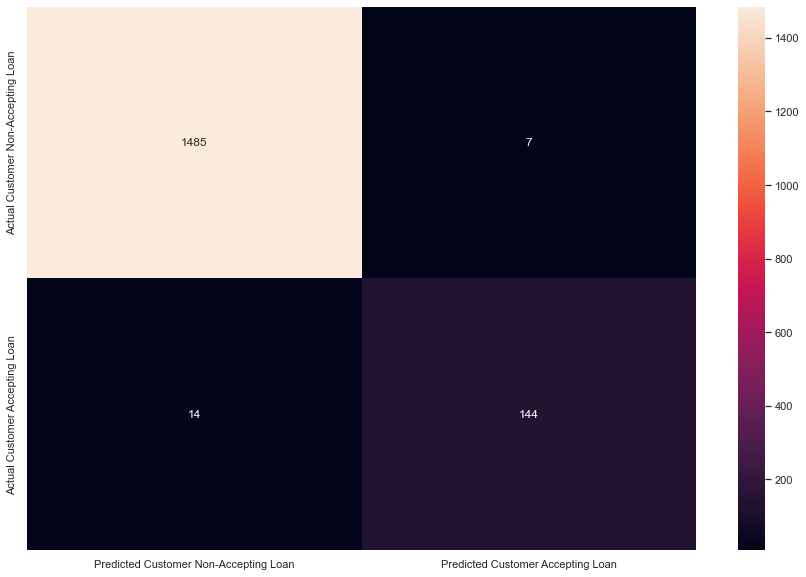

In [229]:
g = sns.heatmap(cm2,fmt="d", annot=True)
g.get_xaxis().set_label_coords(-0.2,0.5)
g.get_yaxis().set_label_coords(-0.2,0.5)
g.set_xticklabels(['Predicted Customer Non-Accepting Loan', 'Predicted Customer Accepting Loan'], ha='center')
g.set_yticklabels(['Actual Customer Non-Accepting Loan', 'Actual Customer Accepting Loan'], va='center')


In [237]:
'The Cohen Kappa Score is {} %'.format(round(cohen_kappa_score(y_test,y_pred2>0.5) * 100,2))

'The Cohen Kappa Score is 92.5 %'